# SALES PREDICTION USING PYTHON

## INTRODUCTION 
This Jupyter Notebook presents a machine learning project focused on predicting product sales based on advertising expenditures. In today's competitive market, understanding the impact of marketing efforts is crucial for businesses to optimize their spending and maximize revenue. This project aims to build a robust predictive model that can forecast sales, thereby assisting in strategic decision-making for advertising campaigns.

Dataset Overview
The dataset used in this project contains historical advertising spend data across three different media channels:
TV: Budget allocated for television advertisements.
Radio: Budget allocated for radio advertisements.
Newspaper: Budget allocated for newspaper advertisements.
Sales: The corresponding sales figures achieved.

Each entry in the dataset represents a specific period (e.g., a month or quarter), detailing the spend in each channel and the resulting sales. This tabular data allows us to analyze how changes in advertising budgets influence sales performance.

By using the Linear Regression Model we will predict the sale of the appliances.

## IMPORTING ESSENTIAL LIBRARIES 

In [83]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

## LOADING DATA

In [84]:
df = pd.read_csv('advertise.data.csv')
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


## Shape of data 

In [85]:
df.shape

(200, 5)

## Description of data 


In [86]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


## Checking for the basic info

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


## checking for the null values 

In [88]:
df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

## Basic Observation

## Pair Plot 

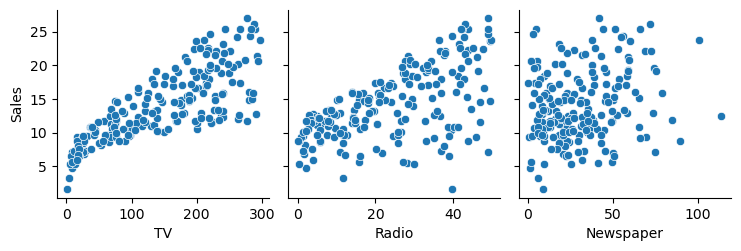

In [89]:
sns.pairplot(df,x_vars = ['TV', 'Radio', 'Newspaper'], y_vars='Sales', kind='scatter')

## Pair PLot Observation 

## HISTOGRAM 

<Axes: xlabel='TV', ylabel='Frequency'>

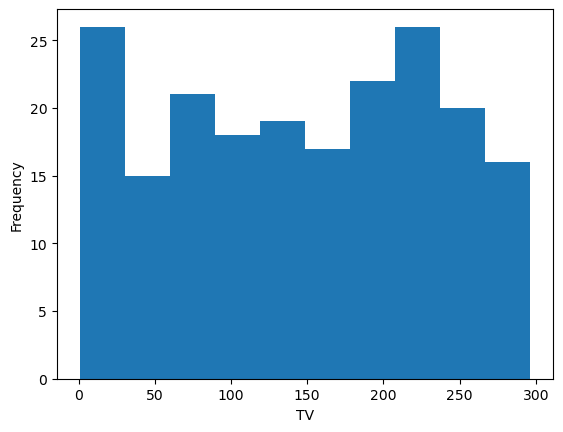

In [90]:
df['TV'].plot.hist(bins=10,xlabel='TV')

<Axes: xlabel='Radio', ylabel='Frequency'>

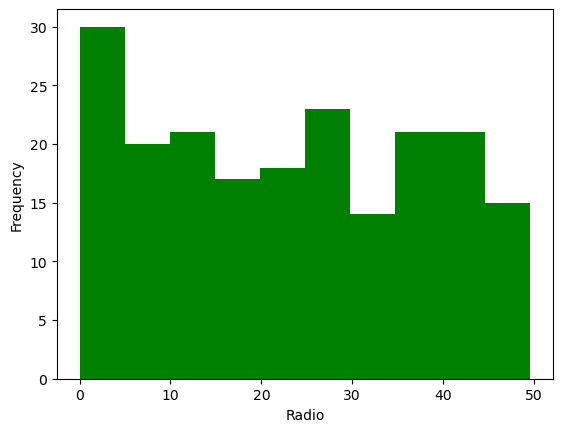

In [91]:
df['Radio'].plot.hist(bins=10,color='green',xlabel='Radio')

<Axes: xlabel='Newspaper', ylabel='Frequency'>

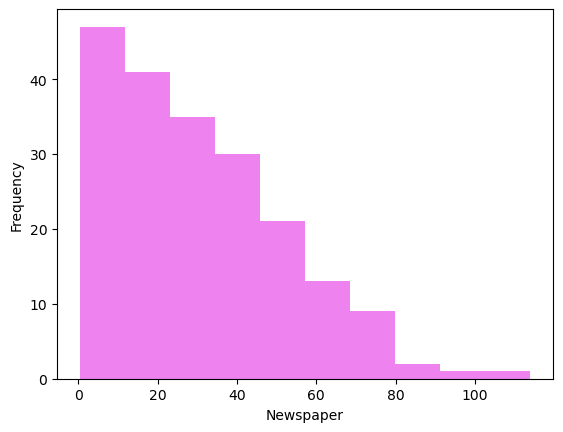

In [92]:
df['Newspaper'].plot.hist(bins=10,color='violet',xlabel='Newspaper')

## HISTOGRAM OPBSERVATION 

## HEAT MAP

<Axes: >

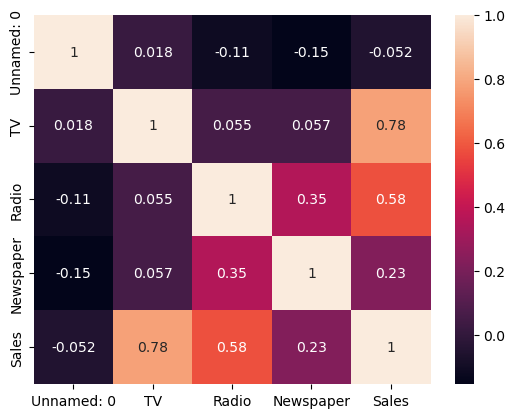

In [93]:
sns.heatmap(df.corr(),annot = True)

## FINAL OBSE5RVATION 

## SPLITTING THE DATA 

In [94]:
#Splitting of data into training daa and test data  
from sklearn.model_selection import train_test_split 

X = df[['TV', 'Radio', 'Newspaper']]
Y = df['Sales']
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3 ,random_state = 0)

In [95]:
print(X_train)

        TV  Radio  Newspaper
131  265.2    2.9       43.0
96   197.6    3.5        5.9
181  218.5    5.4       27.4
19   147.3   23.9       19.1
153  171.3   39.7       37.7
..     ...    ...        ...
67   139.3   14.5       10.2
192   17.2    4.1       31.6
117   76.4    0.8       14.8
47   239.9   41.5       18.5
172   19.6   20.1       17.0

[140 rows x 3 columns]


In [96]:
print(Y_train)

131    12.7
96     11.7
181    12.2
19     14.6
153    19.0
       ... 
67     13.4
192     5.9
117     9.4
47     23.2
172     7.6
Name: Sales, Length: 140, dtype: float64


In [97]:
print(X_test)

        TV  Radio  Newspaper
18    69.2   20.5       18.3
170   50.0   11.6       18.4
107   90.4    0.3       23.2
98   289.7   42.3       51.2
177  170.2    7.8       35.2
182   56.2    5.7       29.7
5      8.7   48.9       75.0
146  240.1    7.3        8.7
12    23.8   35.1       65.9
152  197.6   23.3       14.2
61   261.3   42.7       54.7
125   87.2   11.8       25.9
180  156.6    2.6        8.3
154  187.8   21.1        9.5
80    76.4   26.7       22.3
7    120.2   19.6       11.6
33   265.6   20.0        0.3
130    0.7   39.6        8.7
37    74.7   49.4       45.7
74   213.4   24.6       13.1
183  287.6   43.0       71.8
145  140.3    1.9        9.0
45   175.1   22.5       31.5
159  131.7   18.4       34.6
60    53.5    2.0       21.4
123  123.1   34.6       12.4
179  165.6   10.0       17.6
185  205.0   45.1       19.6
122  224.0    2.4       15.6
44    25.1   25.7       43.3
16    67.8   36.6      114.0
55   198.9   49.4       60.0
150  280.7   13.9       37.0
111  241.7   3

In [98]:
print(Y_test)

18     11.3
170     8.4
107     8.7
98     25.4
177    11.7
182     8.7
5       7.2
146    13.2
12      9.2
152    16.6
61     24.2
125    10.6
180    10.5
154    15.6
80     11.8
7      13.2
33     17.4
130     1.6
37     14.7
74     17.0
183    26.2
145    10.3
45     14.9
159    12.9
60      8.1
123    15.2
179    12.6
185    22.6
122    11.6
44      8.5
16     12.5
55     23.7
150    16.1
111    21.8
22      5.6
189     6.7
129     9.7
4      12.9
83     13.6
106     7.2
134    10.8
66      9.5
26     15.0
113    15.9
168    17.1
63     14.0
8       4.8
75      8.7
118    15.9
143    10.4
71     12.4
124    19.7
184    17.6
97     15.5
149    10.1
24      9.7
30     21.4
160    14.4
40     16.6
56      5.5
Name: Sales, dtype: float64


## TRAINING OF THE MODEL USING LINEAR REGRESSION MODEL

In [99]:
## importing the Linear Regression model
from sklearn.linear_model import LinearRegression 
model = LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

## MODEL EVALUATION 

In [100]:
from sklearn import metrics

# --- Linear Regression Evaluation ---

# Predictions on training data
lin_reg_train_pred = model.predict(X_train)
# Predictions on test data
lin_reg_test_pred = model.predict(X_test)

print("--- Linear Regression Model Evaluation ---")

# R squared Error
r2_train_lin_reg = metrics.r2_score(Y_train, lin_reg_train_pred)
r2_test_lin_reg = metrics.r2_score(Y_test, lin_reg_test_pred)
print(f"R-squared (Train): {r2_train_lin_reg:.4f}")
print(f"R-squared (Test):  {r2_test_lin_reg:.4f}")

# Mean Absolute Error
mae_train_lin_reg = metrics.mean_absolute_error(Y_train, lin_reg_train_pred)
mae_test_lin_reg = metrics.mean_absolute_error(Y_test, lin_reg_test_pred)
print(f"MAE (Train):       {mae_train_lin_reg:.4f}")
print(f"MAE (Test):        {mae_test_lin_reg:.4f}")

# Mean Squared Error
mse_train_lin_reg = metrics.mean_squared_error(Y_train, lin_reg_train_pred)
mse_test_lin_reg = metrics.mean_squared_error(Y_test, lin_reg_test_pred)
print(f"MSE (Train):       {mse_train_lin_reg:.4f}")
print(f"MSE (Test):        {mse_test_lin_reg:.4f}")

# Root Mean Squared Error
rmse_train_lin_reg = np.sqrt(mse_train_lin_reg)
rmse_test_lin_reg = np.sqrt(mse_test_lin_reg)
print(f"RMSE (Train):      {rmse_train_lin_reg:.4f}")
print(f"RMSE (Test):       {rmse_test_lin_reg:.4f}")

--- Linear Regression Model Evaluation ---
R-squared (Train): 0.9066
R-squared (Test):  0.8649
MAE (Train):       1.2502
MAE (Test):        1.2334
MSE (Train):       2.4864
MSE (Test):        3.6914
RMSE (Train):      1.5768
RMSE (Test):       1.9213


## VISUALIZATION 

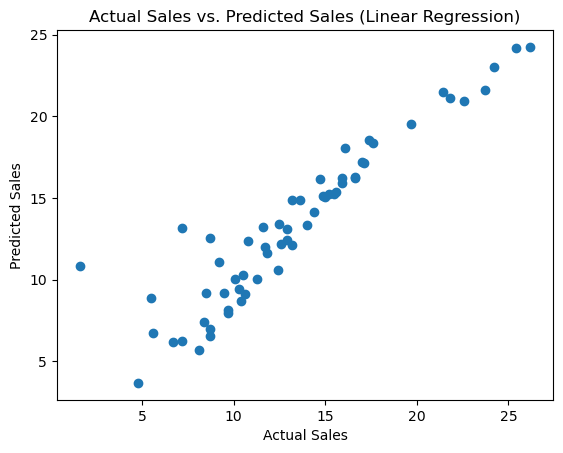

In [101]:
#Visualize Actual vs. Predicted (Test Data)

plt.scatter(Y_test, lin_reg_test_pred)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual Sales vs. Predicted Sales (Linear Regression)")
plt.show()

## TESTING OF THE DATA 

In [102]:
new_ad_spend = np.array([[150, 25, 30]]) # This is a 2D array with 3 features

# Predict sales using the model trained on 3 features
predicted_sales = model.predict(new_ad_spend)

print(f"Predicted Sales for TV={new_ad_spend[0][0]}, Radio={new_ad_spend[0][1]}, Newspaper={new_ad_spend[0][2]} spend: {predicted_sales[0]:.2f}")


Predicted Sales for TV=150, Radio=25, Newspaper=30 spend: 14.53


C:\Users\ANSH JAISWAL\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
